In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [4]:
class BayesClassifier:
    
    def __init__(self):
        self.prior_prob = []
        self.mean_vectors = []
        self.cov_matrices = []
        
    def fit(self, X_train_pca, y_train):
        self.prior_prob = self.calculate_prior_prob(y_train)
        self.mean_vectors = self.calculate_mean_vectors(X_train_pca, y_train)
        self.cov_matrices = self.calculate_cov_matrices(X_train_pca, y_train)
        
    def calculate_prior_prob(self, y):
        classes, class_count = np.unique(y, return_counts = True)
        prior_prob = class_count/len(y)
        return prior_prob
    
    def calculate_mean_vectors(self, X, y):
        mean_vectors = []
        labels = np.unique(y)
        for label in labels:
            mean_vectors.append(np.mean(X[y['Diagnosis'] == label], axis = 0))
        return mean_vectors
    
    def calculate_cov_matrices(self, X, y):
        cov_matrices = []
        labels = np.unique(y)
        for label in labels:
            cov_matrices.append(np.cov(X[y['Diagnosis'] == label], rowvar = False))
        return cov_matrices
    
    def predict(self, X_test):
        y_pred = []
        labels = np.unique(y_train)
        ln_of_determinants = np.log(np.linalg.det(self.cov_matrices[0])/np.linalg.det(self.cov_matrices[1]))
        for x in X_test:
            discriminant_values = []
            for i in range (0, len(labels)):
                mean = self.mean_vectors[i]
                cov_matrix = self.cov_matrices[i]
                prior = self.prior_prob[i]
                
                x_minus_mean = x - mean
                inv_cov_matrix = np.linalg.inv(cov_matrix)
                discriminant_part = np.dot(np.dot(x_minus_mean.T, inv_cov_matrix), x - mean)
                discriminant_values.append(discriminant_part)
                
            decision = discriminant_values[0] - discriminant_values[1] + ln_of_determinants
            
            if decision < 2* np.log(self.prior_prob[0]/self.prior_prob[1]):
                decision_class = 'B'
            else:
                decision_class = 'M'
            
            y_pred.append(decision_class)    
        return y_pred  

In [5]:
def accuracy_score(y_pred, y_true):      
    actual_labels = len(y_true)
    correct_labels = sum(1 for yt, yp in zip(y_true, y_pred) if yt == yp)
    accuracy = correct_labels / actual_labels
    return accuracy * 100

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling data
standardized_data = StandardScaler()
X_train_scaled = standardized_data.fit_transform(X_train)
X_test_scaled = standardized_data.transform(X_test)

# Apply PCA
pca = PCA(n_components = 7)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

Number of Benign: 357 (0.627%)
Number of Malign: 212 (0.373%)


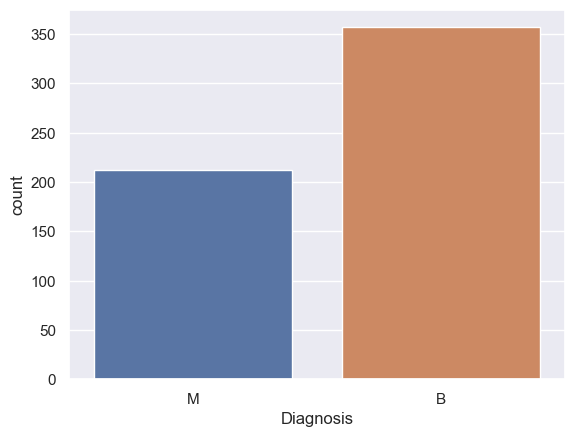

In [7]:
sns.set(style="darkgrid")
ax = sns.countplot(x = y['Diagnosis'])       
B, M = y.value_counts(sort=True) 
percentage_B = B/len(y['Diagnosis'])
percentage_M = M/len(y['Diagnosis'])
print(f"Number of Benign: {B} ({round(percentage_B, 3)}%)")
print(f"Number of Malign: {M} ({round(percentage_M, 3)}%)")

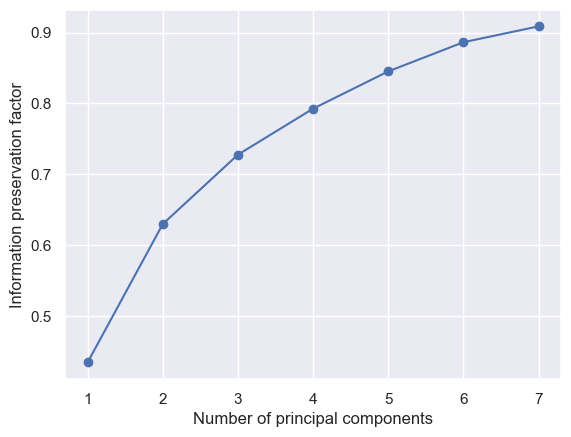

   Principal Component  Cumulative variance
0                    1            43.502782
1                    2            63.002788
2                    3            72.784307
3                    4            79.270717
4                    5            84.524094
5                    6            88.636894
6                    7            90.872484


In [8]:
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.ylabel('Information preservation factor')
plt.xlabel('Number of principal components')
plt.show()

df = pd.DataFrame({'Principal Component': range(1, len(cumulative_explained_variance) + 1),
                   'Cumulative variance': cumulative_explained_variance * 100 })

print(df)

We want to keep 90% of all cumulative variance. The optimum number of PCA components is 7.

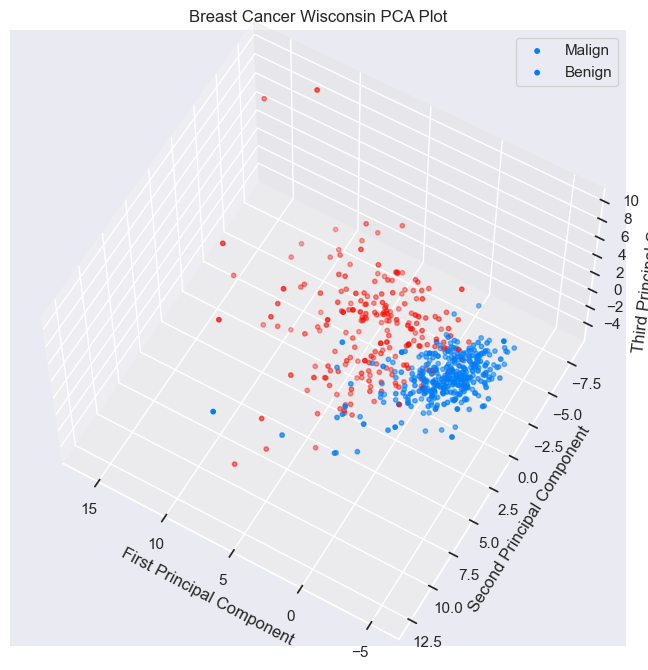

In [9]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for malign and benign points
malign_benign_colors_train = ['#fa0b00' if diagnosis == 'M' else '#007dfa' for diagnosis in y_train['Diagnosis']]
malign_benign_colors_test = ['#fa0b00' if diagnosis == 'M' else '#007dfa' for diagnosis in y_test['Diagnosis']]
ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], X_train_pca[:, 2], c= malign_benign_colors_train, s=10, label="Malign")
ax.scatter(X_test_pca[:, 0], X_test_pca[:, 1], X_test_pca[:, 2], c= malign_benign_colors_test, s=10, label="Malign")

ax.legend(['Malign', 'Benign'], loc="upper right")
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')

ax.set_title("Breast Cancer Wisconsin PCA Plot")
ax.view_init(60, 120)

#ax.view_init(70, 120)

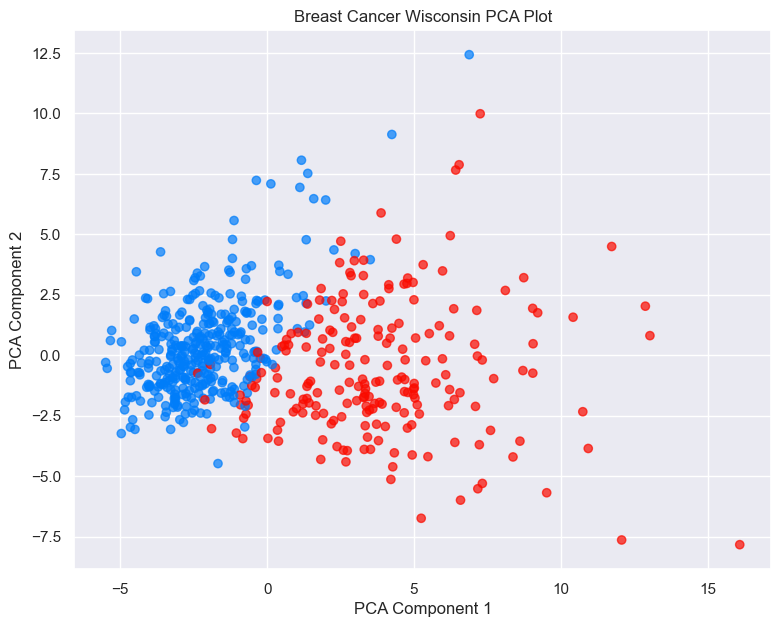

In [10]:
fig = plt.figure(figsize=(9,7))

plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c= malign_benign_colors_train, alpha=0.7)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c= malign_benign_colors_test, alpha=0.7)

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

plt.title("Breast Cancer Wisconsin PCA Plot")
plt.show()

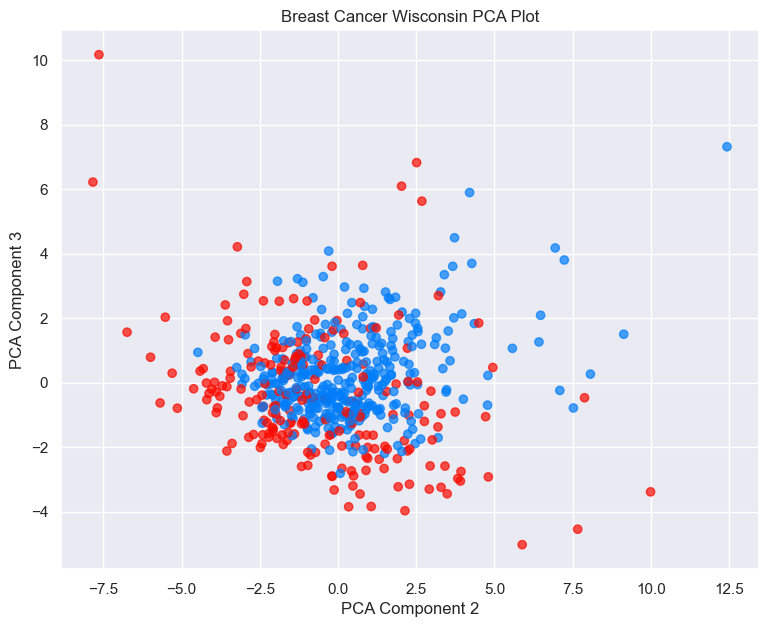

In [11]:
fig = plt.figure(figsize=(9,7))

plt.scatter(X_train_pca[:, 1], X_train_pca[:, 2], c= malign_benign_colors_train, alpha=0.7)
plt.scatter(X_test_pca[:, 1], X_test_pca[:, 2], c= malign_benign_colors_test, alpha=0.7)

plt.xlabel("PCA Component 2")
plt.ylabel("PCA Component 3")

plt.title("Breast Cancer Wisconsin PCA Plot")
plt.show()

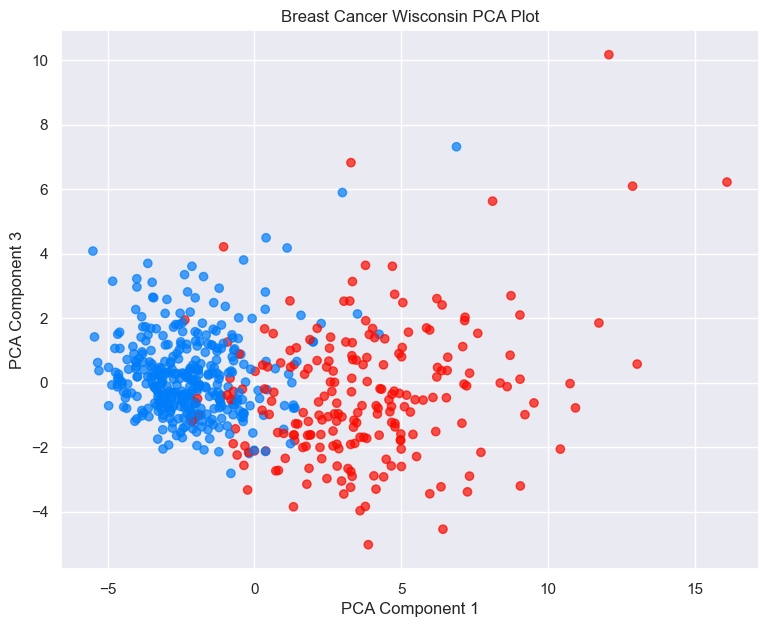

In [12]:
fig = plt.figure(figsize=(9,7))

plt.scatter(X_train_pca[:, 0], X_train_pca[:, 2], c= malign_benign_colors_train, alpha=0.7)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 2], c= malign_benign_colors_test, alpha=0.7)

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 3")

plt.title("Breast Cancer Wisconsin PCA Plot")
plt.show()

In [13]:
classifier_test = BayesClassifier()

In [14]:
classifier_test.fit(X_train_pca, y_train)

In [15]:
predictions = classifier_test.predict(X_test_pca)

In [16]:
accuracy_score(predictions, y_test['Diagnosis'])

97.36842105263158

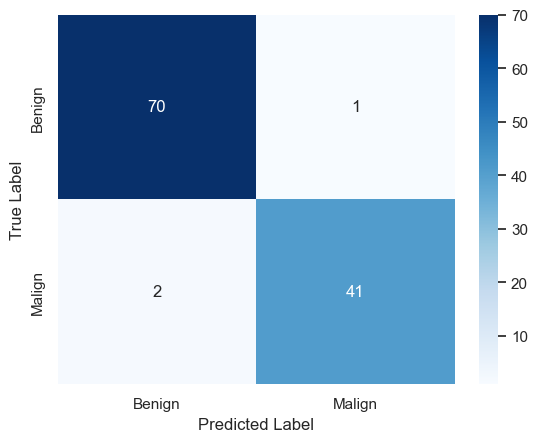

In [17]:
classes = ['Benign','Malign']
ax = sns.heatmap(confusion_matrix(y_test['Diagnosis'], predictions), cmap = 'Blues', annot=True, fmt ='d', xticklabels=classes, yticklabels=classes)
ax.set(xlabel="Predicted Label", ylabel="True Label")
plt.show()

In [18]:
acc_scores = []
for i in range(2,11):
    col = []
    for j in range(20,45,5):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=j*0.01, random_state=42)
        standardized_data = StandardScaler()
        X_train_scaled = standardized_data.fit_transform(X_train)
        X_test_scaled = standardized_data.transform(X_test)
        pca = PCA(n_components = i)
        X_train_pca = pca.fit_transform(X_train_scaled)
        X_test_pca = pca.transform(X_test_scaled)
        column_values = ['PC{}'.format(i + 1) for i in range(i)] 
        df = pd.DataFrame(data = X_train_pca, index=y_train.index, columns = column_values) 
        df = pd.concat([df, y_train], axis = 1)
        classifier_test = BayesClassifier()
        classifier_test.fit(X_train_pca, y_train)
        predictions = classifier_test.predict(X_test_pca)
        accuracy_score(y_test['Diagnosis'], predictions)
        col.append(round(accuracy_score(y_test['Diagnosis'],predictions)/100,3))
    acc_scores.append(col)

In [19]:
df_scores = pd.DataFrame(acc_scores)
df_scores = df_scores.transpose()
df_scores.index = [round(i*0.01,2) for i in range (20,45,5)]
df_scores.columns = [i for i in range(2,11)]

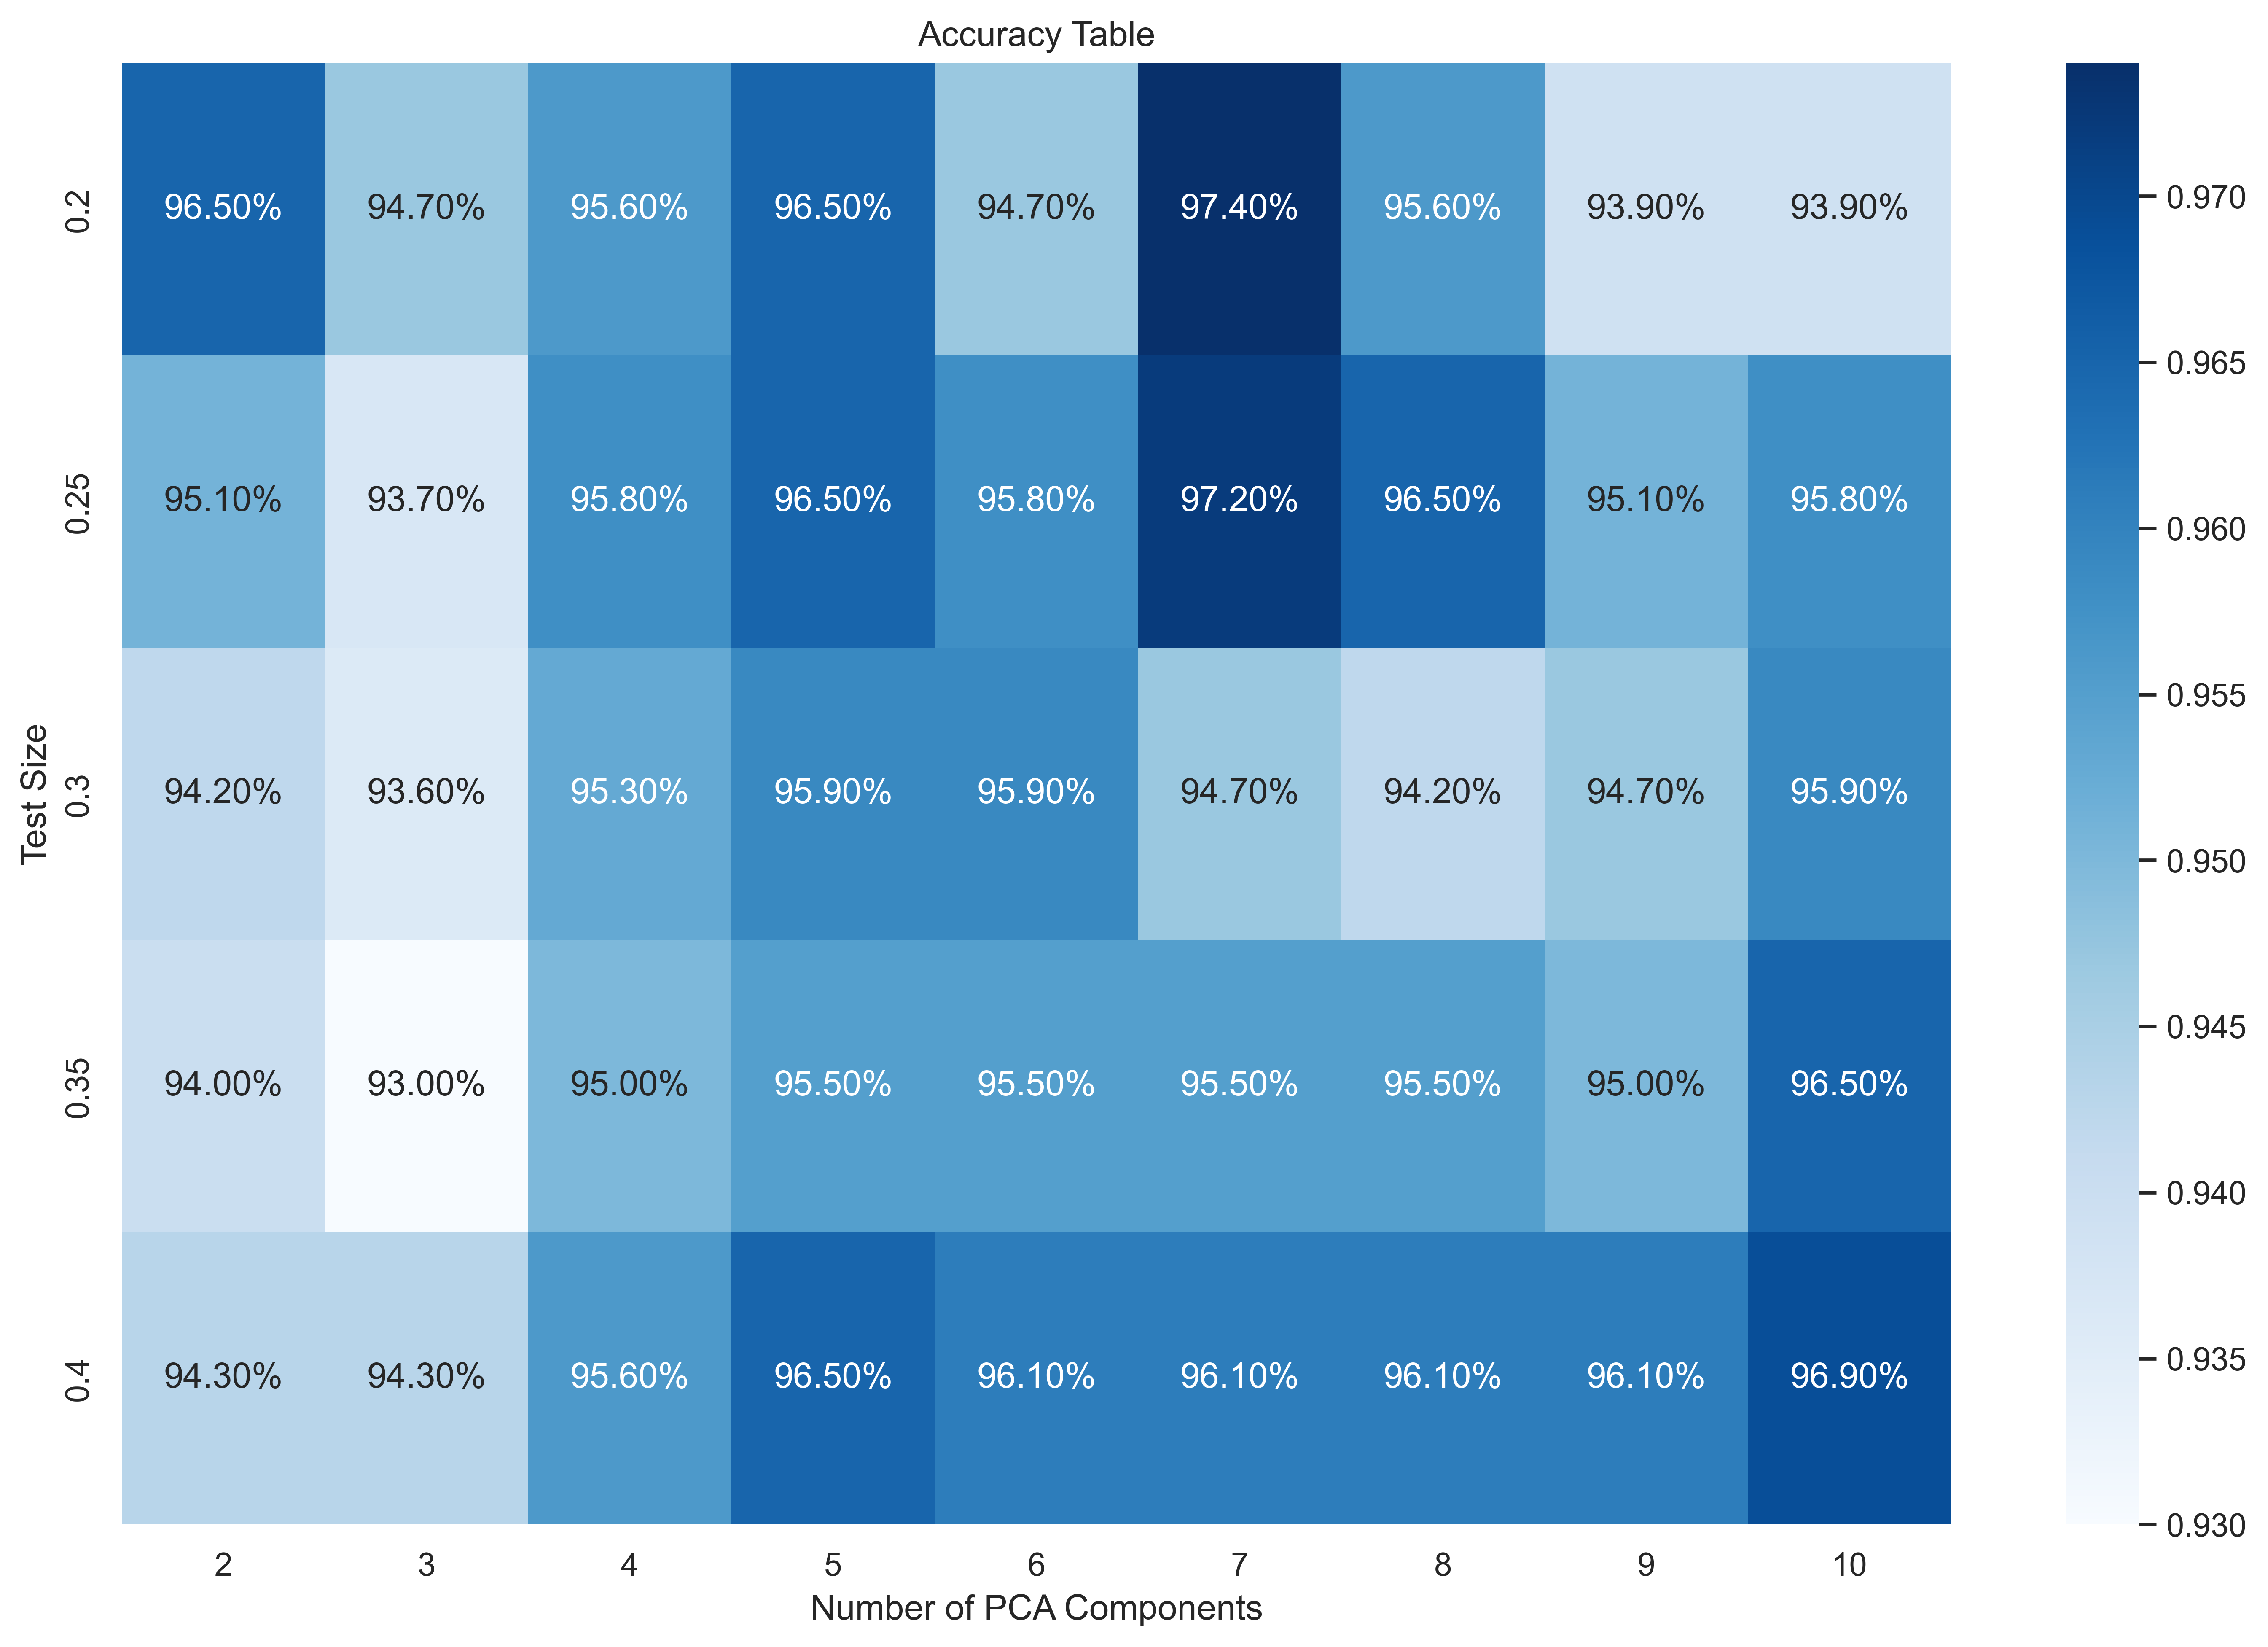

In [20]:
plt.figure(figsize=(14,9),dpi=500)

ax = sns.heatmap(df_scores, cmap = 'Blues', annot=True,fmt='.2%')
plt.title('Accuracy Table')
plt.xlabel('Number of PCA Components')
plt.ylabel('Test Size')
plt.show()

In [21]:
df_scores * 100

,2,3,4,5,6,7,8,9,10
0.20,96.5,94.7,95.6,96.5,94.7,97.4,95.6,93.9,93.9
0.25,95.1,93.7,95.8,96.5,95.8,97.2,96.5,95.1,95.8
0.30,94.2,93.6,95.3,95.9,95.9,94.7,94.2,94.7,95.9
0.35,94.0,93.0,95.0,95.5,95.5,95.5,95.5,95.0,96.5
0.40,94.3,94.3,95.6,96.5,96.1,96.1,96.1,96.1,96.9


Best classification score is obtained for 7 principal components and a test size of 20% 